<a href="https://colab.research.google.com/github/Sohampimpalgaonkar/DL/blob/main/dl_pract_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Practical No. 2**

Write a program to Experiment with different datasets to demonstrate overfitting and underfitting issues

Problem Definition :- The objective is to illustrate the concepts of
overfitting and underfitting using polynomial regression on synthetic
datasets. We aim to generate synthetic datasets with known
relationships, fit polynomial regression models of varying degrees, and
visualize how model complexity affects performance on training and
test datasets.

Degree 1: Train MSE = 0.303, Test MSE = 0.175
Degree 4: Train MSE = 0.088, Test MSE = 0.077
Degree 15: Train MSE = 0.051, Test MSE = 0.097


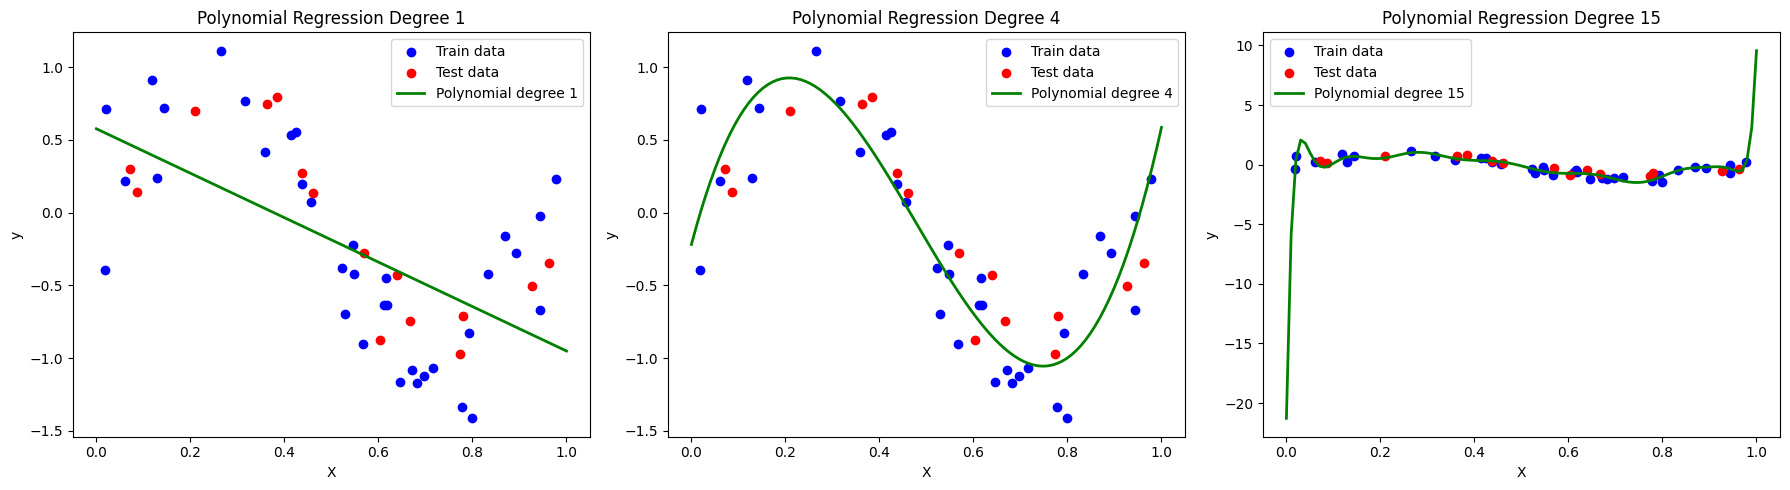

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Use your provided data generation
np.random.seed(0)
n_samples = 50
X = np.sort(np.random.rand(n_samples)).reshape(-1, 1)
y = np.sin(2 * np.pi * X).ravel() + np.random.randn(n_samples) * 0.3

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def fit_and_evaluate(X_train, y_train, X_test, y_test, degree):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    return model, poly, mse_train, mse_test, y_train_pred, y_test_pred

degrees = [1, 4, 15]
models = {}
polys = {}

for degree in degrees:
    model, poly, mse_train, mse_test, _, _ = fit_and_evaluate(X_train, y_train, X_test, y_test, degree)
    models[degree] = model
    polys[degree] = poly
    print(f"Degree {degree}: Train MSE = {mse_train:.3f}, Test MSE = {mse_test:.3f}")

# Plotting
X_plot = np.linspace(0, 1, 100).reshape(-1, 1)

plt.figure(figsize=(18, 5))
for i, degree in enumerate(degrees, start=1):
    plt.subplot(1, 3, i)
    poly = polys[degree]
    model = models[degree]
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)

    plt.scatter(X_train, y_train, color='blue', label='Train data')
    plt.scatter(X_test, y_test, color='red', label='Test data')
    plt.plot(X_plot, y_plot, color='green', label=f'Polynomial degree {degree}', linewidth=2)
    plt.title(f'Polynomial Regression Degree {degree}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

plt.tight_layout()
plt.show()


## Output Analysis

The plots and the Mean Squared Error (MSE) values for the different polynomial degrees demonstrate the concepts of underfitting, a good fit, and overfitting:

- **Degree 1 (Underfitting):**
    - The linear model (degree 1) is too simple to capture the underlying sinusoidal relationship in the data.
    - The plot shows a straight line that does not fit the data points well.
    - Both the training MSE (0.303) and test MSE (0.175) are relatively high, indicating poor performance on both the training and unseen test data. This is a clear example of underfitting, where the model has high bias.

- **Degree 4 (Good Fit):**
    - The polynomial model with degree 4 provides a good balance.
    - The plot shows a curve that closely follows the general trend of the data points without being overly complex.
    - The training MSE (0.088) is significantly lower than the degree 1 model, and the test MSE (0.077) is the lowest among the three degrees. This indicates that the model generalizes well to new data, representing a good fit.

- **Degree 15 (Overfitting):**
    - The polynomial model with degree 15 is too complex and fits the training data almost perfectly, including the noise.
    - The plot shows a highly wiggly curve that passes very close to most training points but deviates significantly in between, especially at the edges.
    - The training MSE (0.051) is the lowest, suggesting the model has learned the training data very well. However, the test MSE (0.097) is higher than the degree 4 model, indicating that the model performs poorly on unseen test data. This is a classic sign of overfitting, where the model has high variance.

In summary, by increasing the polynomial degree, we observe a decrease in training error but an increase in test error beyond a certain point (degree 4 in this case), which is the hallmark of overfitting. The degree 4 polynomial provides the best trade-off between fitting the training data and generalizing to the test data.

## Conclusion

This experiment effectively demonstrates the concepts of underfitting and overfitting in the context of polynomial regression. A low-degree polynomial (degree 1) resulted in an underfitted model with high error on both training and test data due to its inability to capture the underlying data pattern. A high-degree polynomial (degree 15) resulted in an overfitted model that performed very well on the training data but poorly on unseen test data, indicated by a significantly higher test error. The intermediate-degree polynomial (degree 4) achieved a good balance, showing low error on both training and test sets, representing a well-generalized model. This highlights the importance of selecting an appropriate model complexity to avoid both underfitting and overfitting for optimal performance on new data.